# choose a dataset who contains only the continus variables

In [1]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = sklearn.datasets.fetch_california_housing(return_X_y=False, as_frame=True)
data = data["frame"]

In [2]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
data.shape

(20640, 9)

In [4]:
Target=data.columns[-1]
Feature_names=np.array(data.columns)[:-1]

print(Target)
print(Feature_names)

MedHouseVal
['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude']


In [5]:
y = data[Target]
X = data.drop(axis=1,labels=Target,inplace=False)

## In order to plot the graph, we map y to color

In [6]:
import matplotlib
import matplotlib.cm as cm

In [7]:
minima = min(y)
maxima = max(y)

norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Greys)

mapper_list = [mapper.to_rgba(x)[0] for x in y]

## Preprocessing

## It is necessary in general cases.

## If differents features have same dimension/meaning, we  do not need to normalize. Ex. shap value, shap value of a feature means the average marginal contribution to the prediction, so the shap values of each feature have the same dimension/meaning.


In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_1=MinMaxScaler().fit_transform(X)

X_2=StandardScaler().fit_transform(X)



# MDS (Multidimensional scaling)

##  MDS is used to translate "information about the pairwise 'distances' among a set of n objects or individuals" into a configuration of n  points mapped into an abstract Cartesian space. 

## ex. n k-dimension points ===> n 2-dimension points such that the distance of every two points does not change or change little


### the algorithm runs too slow, so I run it for 1000 points here. It seems that MDS is not appropriate for this dataset.

In [9]:
from sklearn.manifold import MDS


In [10]:
embedding = MDS(n_components=2,
                metric = True, #default True
                dissimilarity='euclidean' # default euclidean
               )

### data after minmaxscaler()

stress: 390.52946177806865


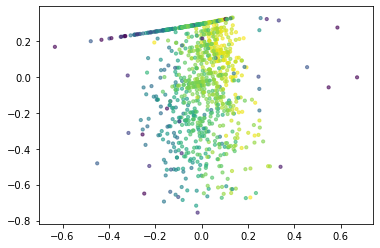

In [11]:
X_mds= embedding.fit_transform(X_1[:1000])
print("stress:",embedding.stress_)## low stress means good result
plt.scatter(X_mds[:,0],X_mds[:,1],c=mapper_list[:1000], alpha = 0.6, s=10)

### data after standardscaler()

stress: 36909.173231102104


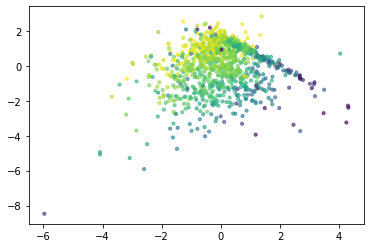

In [12]:
X_mds2= embedding.fit_transform(X_2[:1000])
print("stress:",embedding.stress_)
plt.scatter(X_mds2[:,0],X_mds2[:,1],c=mapper_list[:1000], alpha = 0.6, s=10)

# PCA (Principal Component Analysis)

## Def: the orthogonal projection of the data onto a lower dimensional linear space, known as the principal subspace, such that the variance of the projected data is maximized

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=500)


### data after maxminsclaer()

explained_variance_ratio: [0.5182535  0.35623448]


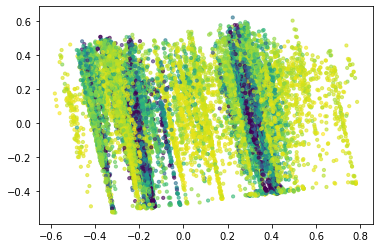

In [14]:

data1=pca.fit_transform(X_1)

print("explained_variance_ratio:",pca.explained_variance_ratio_)

plt.scatter(data1[:,0],data1[:,1],c=mapper_list, alpha = 0.6, s=10)

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert a space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 51.8% of the variance and the second principal component contains 35.6% of the variance.

### data after standardscaler()

explained_variance_ratio: [0.25336868 0.23516245]


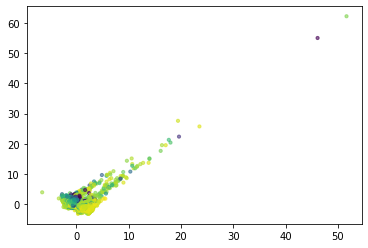

In [15]:
data2=pca.fit_transform(X_2)
print("explained_variance_ratio:",pca.explained_variance_ratio_)
plt.scatter(data2[:,0],data2[:,1],c=mapper_list, alpha = 0.6, s=10)



### We see the explained_variance_ratio, for this dataset maxminsclaer() works better than standardscaler() for PCA. But from these graphs, we cannot see obvious segment.

# UMAP (uniform manifold approximation projection)

### https://umap-learn.readthedocs.io/en/latest/index.html

In [16]:
##pip install umap-learn

In [17]:
import umap
reducer = umap.UMAP(n_components=2)


### data after minmaxscaler()

In [18]:
embedding = reducer.fit_transform(X_1)
### LENT

In [19]:
embedding.shape

(20640, 2)

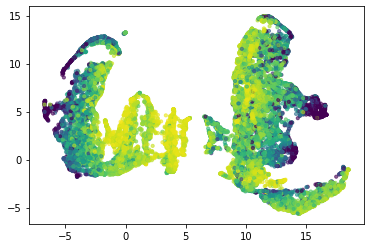

In [20]:
plt.scatter(embedding[:,0],embedding[:,1],c=mapper_list, alpha = 0.6, s=10)

### data after standardscaler()

In [21]:
embedding2 = reducer.fit_transform(X_2)


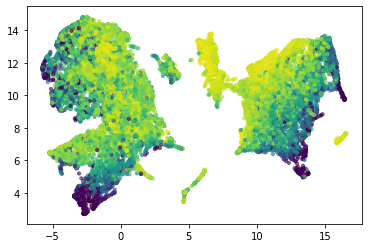

In [22]:
plt.scatter(embedding2[:,0],embedding2[:,1],c=mapper_list, alpha = 0.6, s=10)

### It seems better. We can see some segments. And some points with the same colors gather.

# t-SNE

## https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [23]:
from sklearn.manifold import TSNE


In [30]:
tsne=TSNE(n_components=2,
         learning_rate=200,##default is auto
         init = 'random', ## default is 'pca', we can choose pca
         random_state=0
         )

In [31]:
tsne_result1 = tsne.fit_transform(X_1)
### TROP LENT

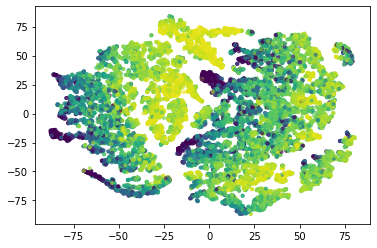

In [32]:
plt.scatter(tsne_result1[:,0],tsne_result1[:,1],c=mapper_list, alpha = 0.6, s=10)

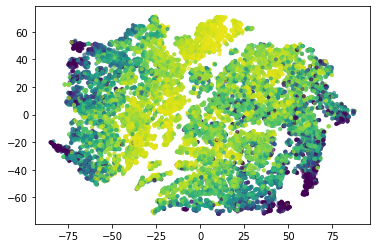

In [33]:
tsne_result2 = tsne.fit_transform(X_2)
plt.scatter(tsne_result2[:,0],tsne_result2[:,1],c=mapper_list, alpha = 0.6, s=10)



# Remark

## speed:    PCA>UMAP>t-SNE   >>? MDS

## MDS is not appropriate for big dataset

## t-SNE preserves only local similarities

## UMAP has better preservation of the data's global structure than t-SNE

## Among these methods, t-SNE shows the best performance of segmentation, but it is a (much) slower than UAMP.


## How to treat categorical variable? mixed type data? : fot t-SNE and UMAP, we need to choose the distance function (default 'euclidean'), we need only to define a proper distance function.  For dataset which contains only categorical variable, we can use MCA to replace PCA, and for dataset with mixed types variables, FAMD https://github.com/MaxHalford/prince can replace PCA



# =================================================

# Do the PCA, t-SNE, UMAP on the shap value set 

In [34]:
import xgboost as xgb

clf = xgb.XGBRegressor(
    n_estimators=50,
    tree_method="approx",      # "gpu_hist" or "hist" or "approx" or "exact"
    #max_depth,booster,random_state,tree_method
)


clf.fit(X, y)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

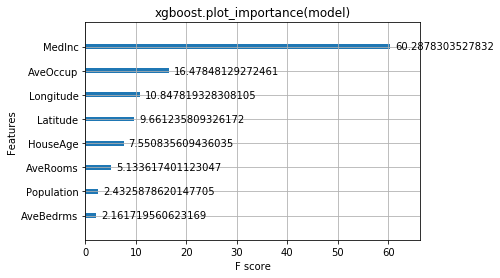

In [35]:

xgb.plot_importance(clf,importance_type='gain',max_num_features=10)
plt.title("xgboost.plot_importance(model)")
plt.show()

In [36]:
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X)
np.shape(shap_values)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


(20640, 8)

In [37]:
shap_values

array([[ 1.8278053 ,  0.12079319,  0.19800065, ..., -0.00433867,
        -0.47199005,  0.51218843],
       [ 1.4314433 , -0.01344311,  0.02379398, ...,  0.16351892,
        -0.43661368,  0.5097363 ],
       [ 1.3170841 ,  0.18882553,  0.36380735, ..., -0.01351094,
        -0.5664886 ,  0.53483015],
       ...,
       [-0.5707286 ,  0.01676222, -0.11192592, ...,  0.12013357,
        -0.92166173,  0.29143152],
       [-0.55316   ,  0.00954084, -0.08274697, ...,  0.17630768,
        -1.1040174 ,  0.3073155 ],
       [-0.44413587,  0.0063089 , -0.13980626, ..., -0.01475052,
        -0.7199354 ,  0.3193474 ]], dtype=float32)

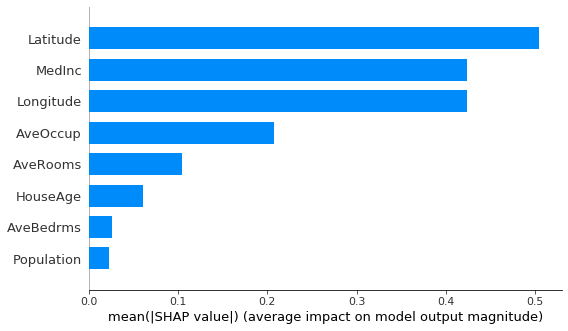

In [38]:
shap.summary_plot(shap_values,X,plot_type="bar")

## PCA

explained_variance_ratio: [0.45620942 0.34753856]


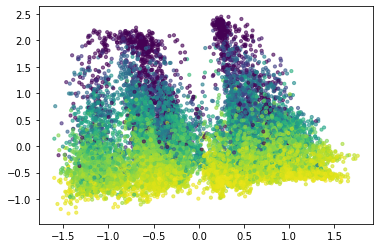

In [39]:
pca = PCA(n_components=2,random_state=500)

data_new=pca.fit_transform(shap_values)

print("explained_variance_ratio:",pca.explained_variance_ratio_)

plt.scatter(data_new[:,0],data_new[:,1],c=mapper_list, alpha = 0.6, s=10)




## UMAP

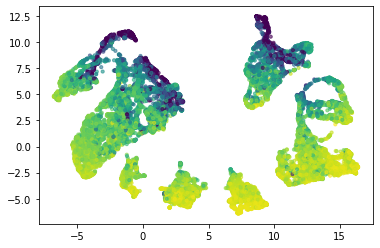

In [40]:
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(shap_values)
plt.scatter(embedding[:,0],embedding[:,1],c=mapper_list, alpha = 0.6, s=10)

## t-SNE

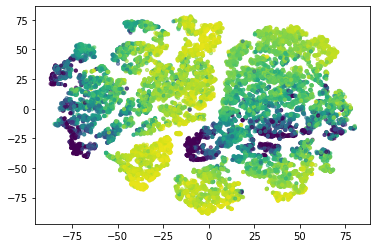

In [42]:
tsne=TSNE(n_components=2,learning_rate=200,init='random',random_state=0)
tsne_result = tsne.fit_transform(shap_values)
plt.scatter(tsne_result[:,0],tsne_result[:,1],c=mapper_list, alpha = 0.6, s=10)